In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf

In [ ]:
pip install yfinance

%matplotlib inline

In [3]:
pip install matplotlib

In [2]:
stock = input("Enter stock code: ")
data = yf.download(stock, auto_adjust=True)
data.tail()

Enter stock code: TTM


NameError: name 'yf' is not defined

In [ ]:
data.isnull().sum()

In [59]:
data.shape

(3035, 5)

In [49]:
data.describe()

,Open,High,Low,Close,Volume
count,6535.000000,6535.000000,6535.000000,6535.000000,6.535000e+03
mean,168.770301,171.409082,165.833571,168.516173,1.519643e+07
std,151.884077,153.775947,149.729180,151.654381,2.101902e+07
min,8.975606,9.393435,8.905966,9.099405,0.000000e+00
25%,45.687083,46.527600,44.492385,45.402588,5.019882e+06
50%,120.417216,122.858547,118.278863,120.528847,8.949767e+06
75%,268.906447,272.283938,263.330404,267.500000,1.664747e+07
max,599.969112,605.655840,589.634252,597.892273,3.905778e+08


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6535 entries, 1995-12-25 to 2021-12-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6535 non-null   float64
 1   High    6535 non-null   float64
 2   Low     6535 non-null   float64
 3   Close   6535 non-null   float64
 4   Volume  6535 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 306.3 KB


Text(0.5, 1.0, 'ADANIPOWER.NS Price Series')

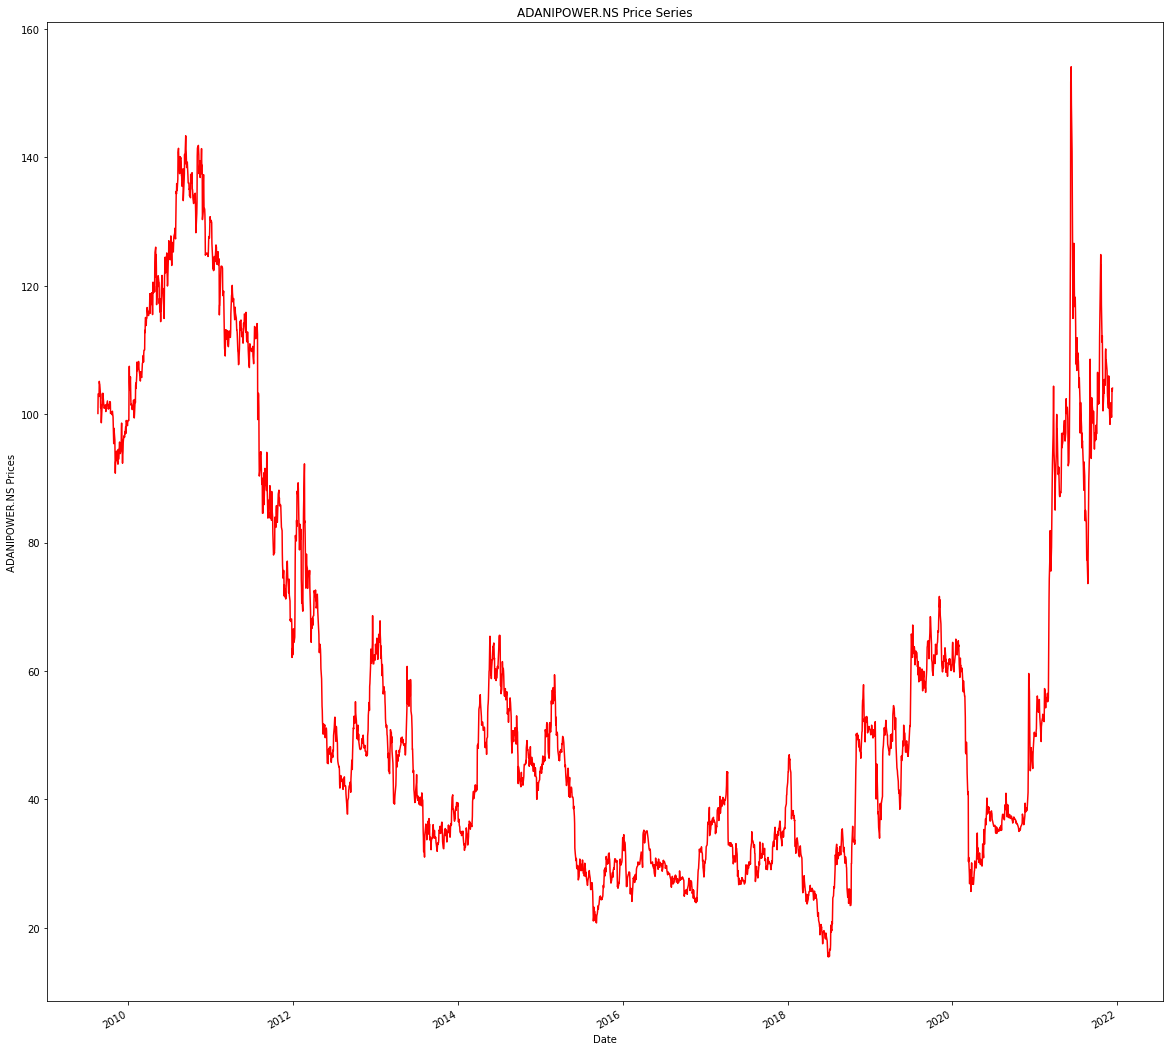

In [67]:
data.Close.plot(figsize=(20, 20), color = 'r')
plt.ylabel(" {} Prices ".format(stock))
plt.title("{} Price Series".format(stock))

c:\users\anike\pycharmprojects\stock price predictor\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

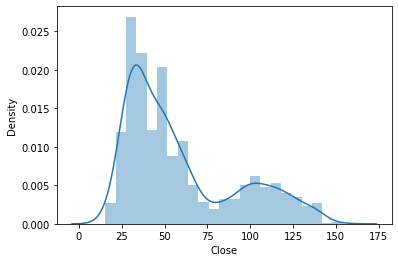

In [64]:
sns.distplot(data["Close"])

<AxesSubplot:>

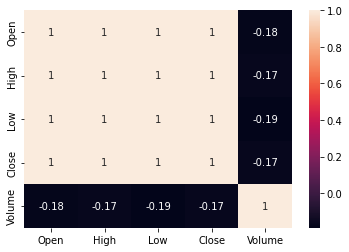

In [63]:
corr = data.corr().round(2)
sns.heatmap(data=corr, annot=True)

In [61]:
X = data.drop(["Close"], axis=1)
Y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2428, 4)
(607, 4)
(2428,)
(607,)


In [68]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

pred = lr.predict(X_test)

In [69]:
pred

array([113.65462644,  49.6203814 ,  61.16804266,  59.99837422,
        71.80196916,  27.28847175,  26.92846846,  49.61154714,
        34.82844811,  26.77865786,  57.82565585, 122.88320371,
        78.4114765 ,  46.5553997 , 112.23266585,  24.46507466,
        38.74910718, 100.40839593,  25.73902118,  38.11328454,
        27.3292911 ,  21.49418986, 141.89948766,  29.93990163,
        43.5026551 ,  32.80949536, 126.26187149,  35.46567293,
        45.24363507,  34.60598578,  23.89631025,  27.7274505 ,
        48.14211119, 113.5951841 ,  41.34541836,  46.83994995,
        70.68953791,  28.37555168, 118.27251848,  44.92286322,
        77.12881992,  55.18138667,  47.20477441,  49.22805995,
        40.4095814 ,  57.83299534,  32.31784125,  85.27036011,
        47.73962466,  51.5756131 , 125.8538724 ,  31.54462611,
        29.96801563,  48.52207097,  58.51196935,  48.88775725,
       142.92247298,  32.08824602,  49.28726101,  29.70480789,
        36.53106076,  57.23339867, 101.90503502,  44.95

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate(y_test, y_pred):
    mse=mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)
    rmse=np.sqrt(mse)
    
    print("RMSE: ",rmse)
    print("R2 SCORE: ", r2)
    print("MSE: ", mse)

calculate(Y_test, pred)
    

RMSE:  0.7349279319140314
R2 SCORE:  0.999483515571697
MSE:  0.5401190651074351


In [86]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso().fit(X_train, Y_train)
ridge = Ridge().fit(X_train, Y_train)

pred2=lasso.predict(X_test)
pred3=ridge.predict(X_test)

c:\users\anike\pycharmprojects\stock price predictor\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.113e+02, tolerance: 2.550e+02
  model = cd_fast.enet_coordinate_descent(


In [87]:
calculate(Y_test, pred)
calculate(Y_test, pred2)
calculate(Y_test, pred3)

RMSE:  0.7349279319140314
R2 SCORE:  0.999483515571697
MSE:  0.5401190651074351
RMSE:  0.8882954207391834
R2 SCORE:  0.9992454594720115
MSE:  0.789068754506203
RMSE:  0.7348569577209922
R2 SCORE:  0.9994836153237785
MSE:  0.5400147483109522


In [88]:
# ridge rocks

In [89]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.103 total time=   0.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.145 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.143 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.125 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.103 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.145 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.143 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.125 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.103 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [92]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train,Y_train) 
svr_pred = svr.predict(X_test)

In [94]:
calculate(Y_test, svr_pred)

RMSE:  34.755346700107815
R2 SCORE:  -0.1550771040900616
MSE:  1207.9341242446953


In [95]:
pip install joblib

In [100]:
import joblib

joblib.dump(ridge, 'model.pkl')
ridge_from_joblib = model = joblib.load("model.pkl")